# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `4` | `Questions`
#### YU Lingfeng 1st draft

> "Hi Team! 👋

> The current notebook contains 10 questions that help you review our course content.

> Each question asks you to answer with specific results. Some questions are the `reverse-engineering-type` questions as I have asked in exercise problem set 3. Other questions require direct answers (because, given the nature of the question, reverse-engineering is not feasible).

> These questions won’t be difficult to solve—and answering them will strengthen your understanding of the learning materials. Importantly, the pathway to each answer has been given in lecture scripts, in-class lessons, answers to discussion board questions, and assigned readings. 

> First try to answer to the questions without setting any time constraints. Then, remove all your answers and try to answer again within a 90-minute time limit (and you may refer to lecture notes and review scripts while you are answering). This kind of timed task will improve your performance and prepare you well for the assessment down the line. Once you complete this, submit your script via eLearn.

> Enjoy!"

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

In [2]:
import pandas_datareader.data as web # this will potentially lead to an error.

from pandas_datareader import data as pdr

import yfinance as yf

(
    yf
    .pdr_override()
)
import warnings
warnings.filterwarnings("ignore")
# pdr
# .get_data_yahoo()

> Let's set some print option.

In [3]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

### <font color = red> Question 1</font>. Please import historical stock data from the web on the following financial instruments, and create the following DataFrame that contains adjusted closing prices. 

### Here, the timeframe should be set between the 13th of October 2014 through the 13th of September 2022 (nine years of data).

- `WMT` Stock of Walmart
- `IBM` Stock of IBM

In [4]:
start = dt.datetime(2014, 10, 13)
end = dt.datetime(2022, 9, 14)

In [5]:
start

datetime.datetime(2014, 10, 13, 0, 0)

In [6]:
WMT = pdr\
        .get_data_yahoo('WMT',
                    start,
                    end)

IBM = pdr\
        .get_data_yahoo('IBM',
                    start,
                    end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
WMT['Tickers'] = 'WMT'
IBM['Tickers'] = 'IBM'

In [8]:
stocks = pd\
    .concat([IBM, 
             WMT], 
            axis=0)\
    .reset_index()\
    .pivot(index = "Date",
           columns = "Tickers",
           values = "Adj Close")
stocks

Tickers,IBM,WMT
Date,,
2014-10-13,118.635681,64.138130
2014-10-14,118.816620,64.485451
2014-10-15,117.491447,62.186546
2014-10-16,116.256760,61.045341
2014-10-17,117.685387,61.276920
...,...,...
2022-09-07,121.597435,133.693253
2022-09-08,122.321060,134.372849
2022-09-09,123.006599,134.776688


Tickers,IBM,WMT
Date,,
2014-10-13,124.599342,65.120033
2014-10-14,124.789429,65.472664
2014-10-15,123.397575,63.138546
2014-10-16,122.100822,61.979893
2014-10-17,123.601288,62.214996
...,...,...
2022-09-07,127.709999,135.740005
2022-09-08,128.470001,136.429993
2022-09-09,129.190002,136.839996


### <font color = red> Question 2</font>. Please run a simple moving average crossover strategy for `IBM`.

### The two moving windows are 20 and 60 days.

### Please show your positions with a plot.

In [9]:
short = 20
long = 60
IBM_trade = stocks[['IBM']]

In [10]:
IBM_trade["SMA_20"] =\
(
    IBM_trade
    ["IBM"]
    .rolling(window = short)
    .mean()
)

IBM_trade["SMA_60"] =\
(
    IBM_trade
    ["IBM"]
    .rolling(window = long)
    .mean()
)

IBM_trade

Tickers,IBM,SMA_20,SMA_60
Date,,,
2014-10-13,118.635681,NaN,NaN
2014-10-14,118.816620,NaN,NaN
2014-10-15,117.491447,NaN,NaN
2014-10-16,116.256760,NaN,NaN
2014-10-17,117.685387,NaN,NaN
...,...,...,...
2022-09-07,121.597435,126.294801,127.012597
2022-09-08,122.321060,126.150553,126.933905
2022-09-09,123.006599,125.991070,126.857078


In [11]:
IBM_trade["positions"] =\
(
    np
    .where(IBM_trade["SMA_20"] > IBM_trade["SMA_60"],
           1, -1)
    # golden, dead
)

IBM_trade =\
(
    IBM_trade
    .dropna()
)

IBM_trade

Tickers,IBM,SMA_20,SMA_60,positions
Date,,,,
2015-01-07,100.917343,103.295297,105.912267,-1
2015-01-08,103.110764,103.146574,105.653518,-1
2015-01-09,103.559898,103.101013,105.399239,-1
2015-01-12,101.822037,102.950336,105.138083,-1
2015-01-13,102.062889,102.996873,104.901518,-1
...,...,...,...,...
2022-09-07,121.597435,126.294801,127.012597,-1
2022-09-08,122.321060,126.150553,126.933905,-1
2022-09-09,123.006599,125.991070,126.857078,-1


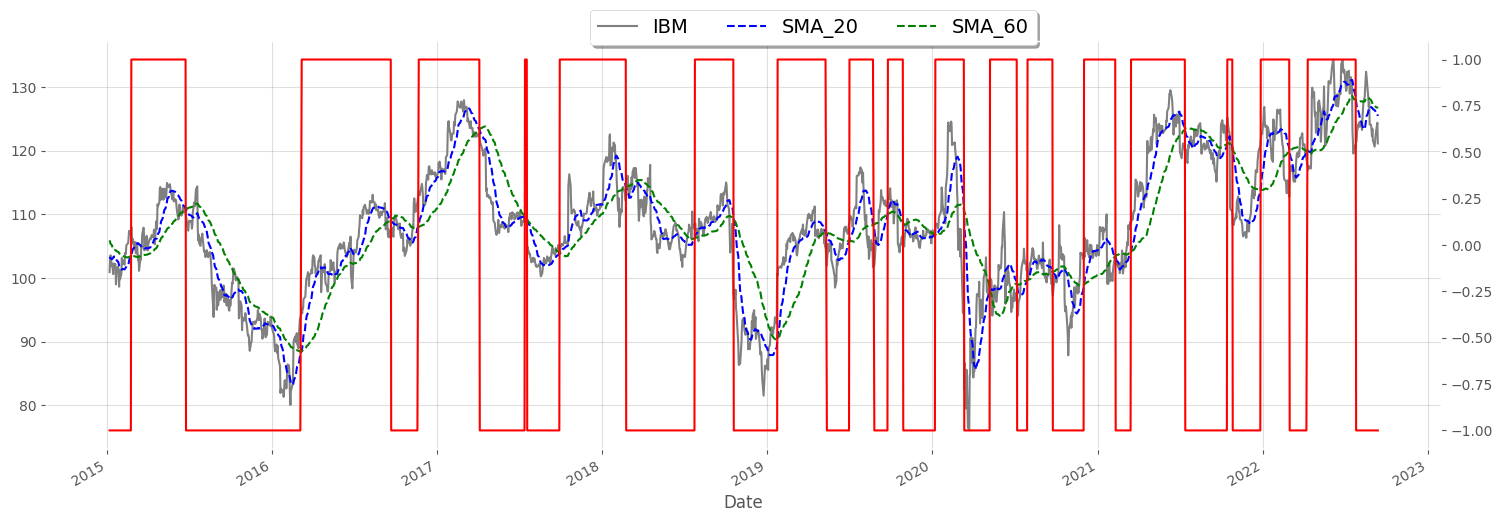

In [12]:
ax =\
(
    IBM_trade
    [["IBM", 
      "SMA_20", 
      "SMA_60", 
      "positions"]]
    .plot(secondary_y = "positions",
          style=["", "--", "--", ""],
          color = ["grey", 
                   "blue",
                   "green",
                   "red"],
          figsize = [18, 6]
         )
)

(
    ax
    .legend(loc = "upper center",
            shadow = True,
            ncol = 4,
            bbox_to_anchor = (0.55, 1.10),
            fancybox = True)
)

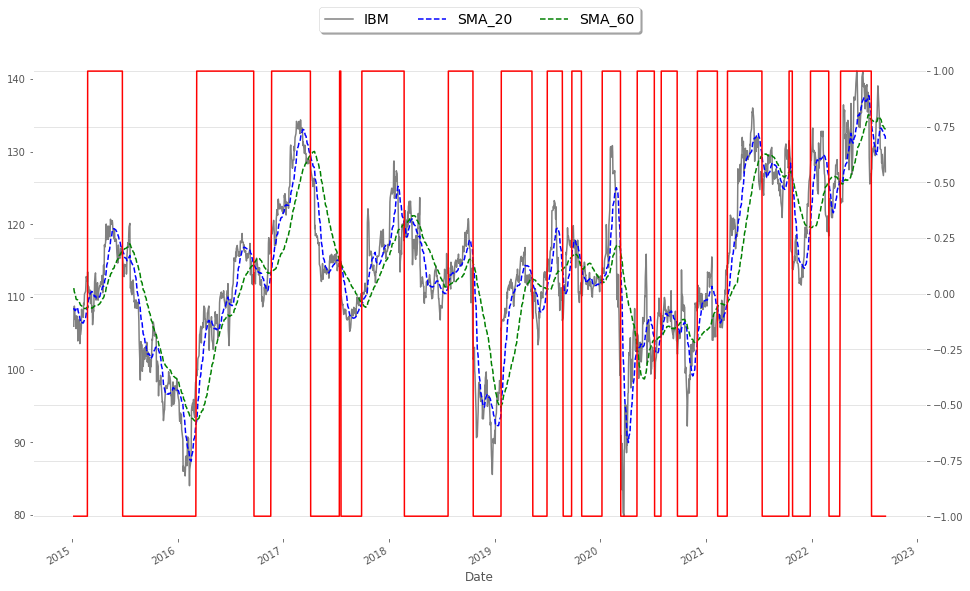

### <font color = red> Question 3</font>. Based on your lines of codes that lead to answer 2 above, compare the returns to see if the strategy leads to a win over the passive benchmark investment.

In [13]:
IBM_trade["RETURNS"] =\
(
    np
    .log(IBM_trade["IBM"] / IBM_trade["IBM"].shift(1)
        )
)

IBM_trade

Tickers,IBM,SMA_20,SMA_60,positions,RETURNS
Date,,,,,
2015-01-07,100.917343,103.295297,105.912267,-1,NaN
2015-01-08,103.110764,103.146574,105.653518,-1,0.021502
2015-01-09,103.559898,103.101013,105.399239,-1,0.004346
2015-01-12,101.822037,102.950336,105.138083,-1,-0.016924
2015-01-13,102.062889,102.996873,104.901518,-1,0.002363
...,...,...,...,...,...
2022-09-07,121.597435,126.294801,127.012597,-1,0.007782
2022-09-08,122.321060,126.150553,126.933905,-1,0.005933
2022-09-09,123.006599,125.991070,126.857078,-1,0.005589


In [14]:
IBM_trade["STRATEGY"] =\
(
    IBM_trade["positions"]
    .shift(1) 
    * 
    IBM_trade["RETURNS"]
)

IBM_trade[["RETURNS", "STRATEGY"]]

Tickers,RETURNS,STRATEGY
Date,,
2015-01-07,NaN,NaN
2015-01-08,0.021502,-0.021502
2015-01-09,0.004346,-0.004346
2015-01-12,-0.016924,0.016924
2015-01-13,0.002363,-0.002363
...,...,...
2022-09-07,0.007782,-0.007782
2022-09-08,0.005933,-0.005933
2022-09-09,0.005589,-0.005589


In [15]:
(
    IBM_trade
    [["RETURNS", "STRATEGY"]]
    .sum()
).apply(np.exp)

Tickers
RETURNS     1.200581
STRATEGY    0.378332
dtype: float64

<Axes: xlabel='Date'>

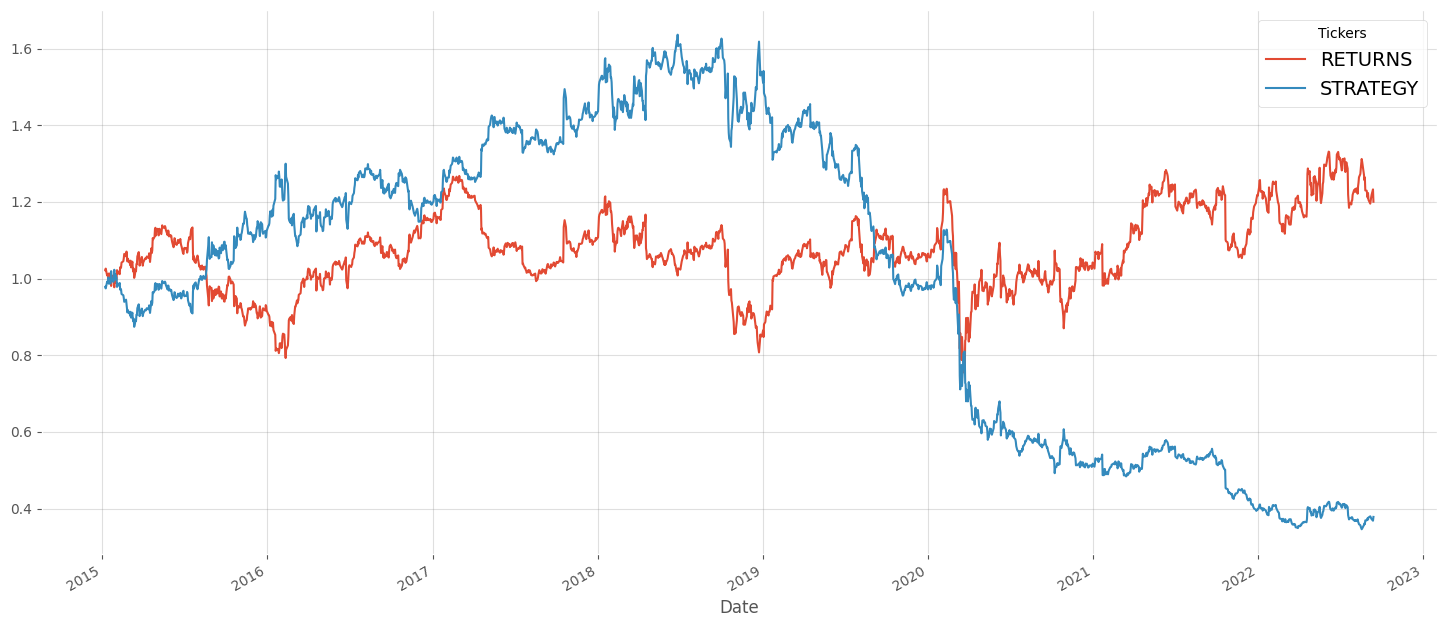

In [16]:
(
    IBM_trade
    [["RETURNS", "STRATEGY"]]
    .cumsum()
    .apply(np.exp)
).plot(figsize = [18, 8]
)

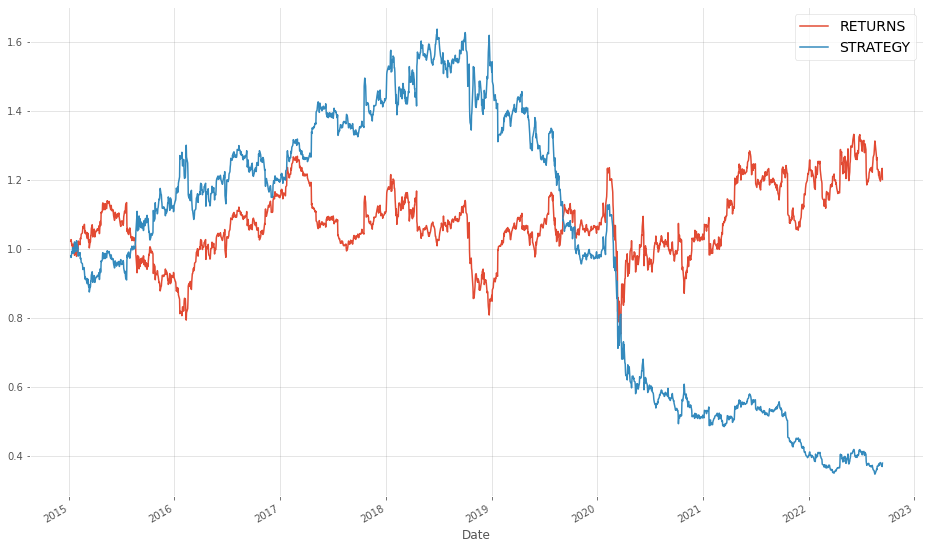

### <font color = red> Question 4</font>. Based on your lines of codes that lead to answer 3 above, please calculate the maximum drawdown and the longest drawdown period.

In [17]:
IBM_trade["cumulative_returns"] =\
(
    IBM_trade["STRATEGY"]
    .cumsum()
    .apply(np.exp)
)

IBM_trade

Tickers,IBM,SMA_20,SMA_60,positions,RETURNS,STRATEGY,cumulative_returns
Date,,,,,,,
2015-01-07,100.917343,103.295297,105.912267,-1,NaN,NaN,NaN
2015-01-08,103.110764,103.146574,105.653518,-1,0.021502,-0.021502,0.978728
2015-01-09,103.559898,103.101013,105.399239,-1,0.004346,-0.004346,0.974483
2015-01-12,101.822037,102.950336,105.138083,-1,-0.016924,0.016924,0.991115
2015-01-13,102.062889,102.996873,104.901518,-1,0.002363,-0.002363,0.988776
...,...,...,...,...,...,...,...
2022-09-07,121.597435,126.294801,127.012597,-1,0.007782,-0.007782,0.376970
2022-09-08,122.321060,126.150553,126.933905,-1,0.005933,-0.005933,0.374739
2022-09-09,123.006599,125.991070,126.857078,-1,0.005589,-0.005589,0.372651


In [18]:
IBM_trade["max_gross_performance"] =\
(
    IBM_trade
    ["cumulative_returns"]
    .cummax()
)

<Axes: xlabel='Date'>

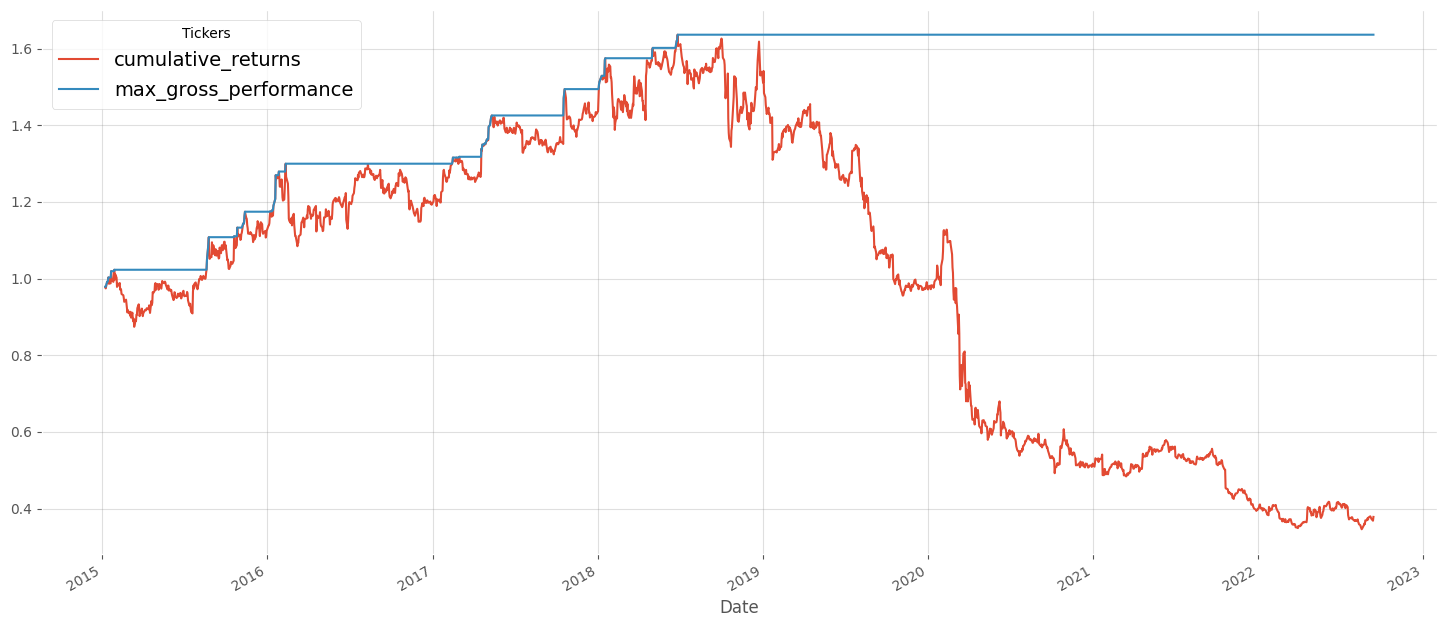

In [19]:
(
    IBM_trade
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

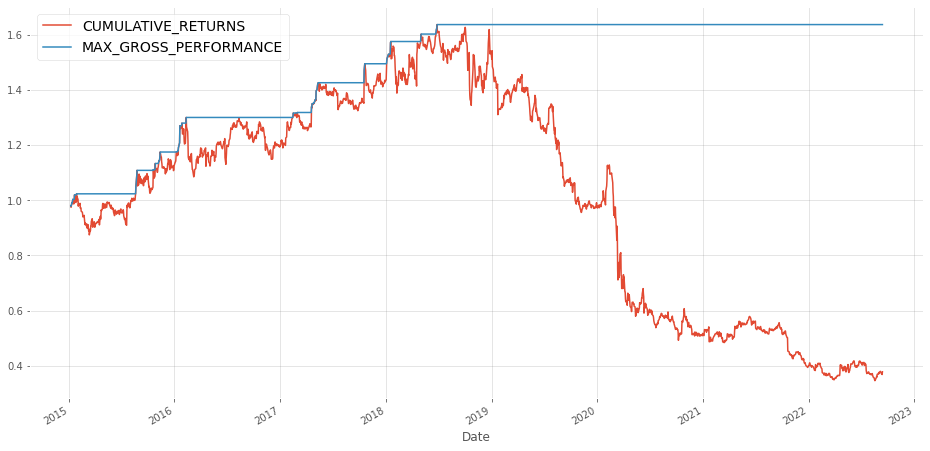

### Please make sure to answer below.

    The maximum drawdown is about ___________ percentage points.
    The longest drawdown period lasts for ___________ days.

### <font color = red> Question 5</font>. Now let’s have a look at the stock price of Walmart (WMT). Please create your strategy based on mean-reversion strategy.

### Here, specifically, please implement a mean-reversion strategy on the basis of a `Simple Moving Average of 41 days` and a `threshold value of 4 for the absolute deviation of the current price` to deviate from the Simple Moving Average to signal a positioning.

In [20]:
threshold = 4
SMA = 41

In [21]:
WMT_trade = stocks[['WMT']]
WMT_trade

Tickers,WMT
Date,
2014-10-13,64.138130
2014-10-14,64.485451
2014-10-15,62.186546
2014-10-16,61.045341
2014-10-17,61.276920
...,...
2022-09-07,133.693253
2022-09-08,134.372849
2022-09-09,134.776688


In [22]:
WMT_trade["RETURNS"] =\
(np
    .log(WMT_trade["WMT"] 
         /
         WMT_trade["WMT"]
         .shift(1)
        )
)

In [23]:
WMT_trade["SMA_41"] =\
(
    WMT_trade["WMT"]
    .rolling(window = SMA)
    .mean()
)
WMT_trade["distance"] = WMT_trade["WMT"] - WMT_trade["SMA_41"]
WMT_trade

Tickers,WMT,RETURNS,SMA_41,distance
Date,,,,
2014-10-13,64.138130,NaN,NaN,NaN
2014-10-14,64.485451,0.005401,NaN,NaN
2014-10-15,62.186546,-0.036301,NaN,NaN
2014-10-16,61.045341,-0.018522,NaN,NaN
2014-10-17,61.276920,0.003786,NaN,NaN
...,...,...,...,...
2022-09-07,133.693253,0.025367,129.210628,4.482624
2022-09-08,134.372849,0.005070,129.496552,4.876297
2022-09-09,134.776688,0.003001,129.785149,4.991538


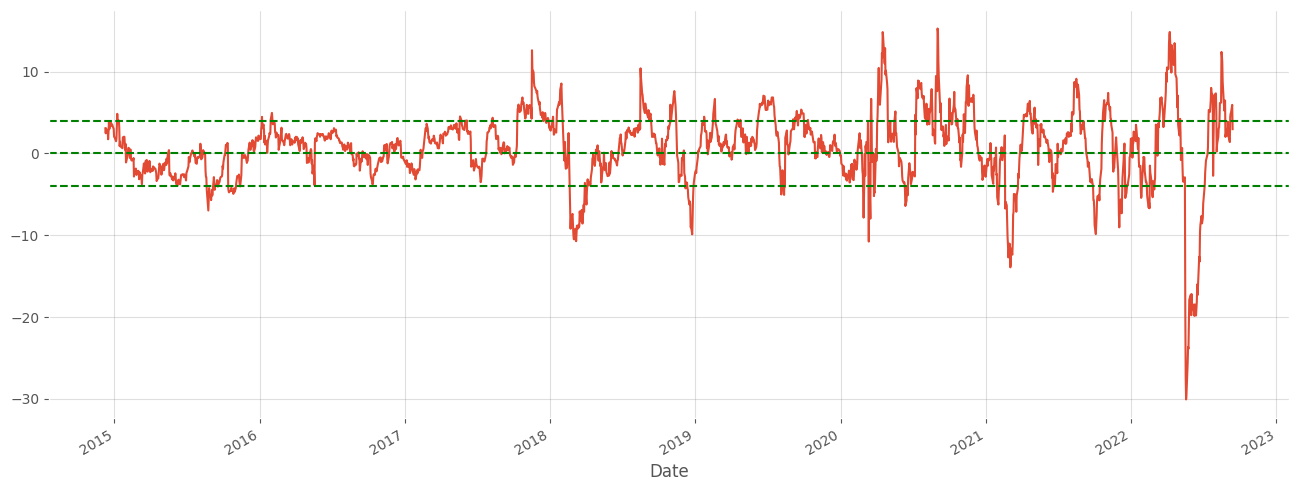

In [24]:
(WMT_trade["distance"]
 .dropna()
 .plot(figsize = [16, 6]
      )
)

plt.axhline(threshold, color = "green", ls = "--")

plt.axhline(0, color = "green", ls = "--")

plt.axhline(-threshold, color = "green", ls = "--")

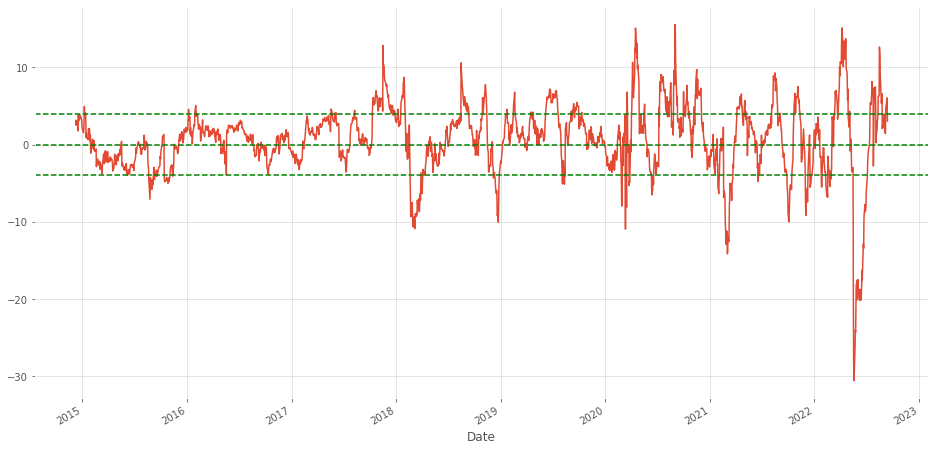

### <font color = red> Question 6</font> Now, please plot your buy positions using red dots, and your sell positions using blue dots, as shown below.

In [25]:
WMT_trade["trading_positions"] =\
(
    np
    .where(WMT_trade["distance"] > threshold, # overbought --> sell (short)
           -1, np.nan)
)

WMT_trade["trading_positions"] =\
(
    np
    .where(WMT_trade["distance"] < -threshold, # oversold --> buy (long)
           1, WMT_trade["trading_positions"]
          )
)

WMT_trade["trading_positions"] =\
(
    np
    #           +                            - 
    #           -                            +
    .where(WMT_trade["distance"] * WMT_trade["distance"].shift(1) < 0, # oversold --> buy (long)
           0, WMT_trade["trading_positions"]
          )
)

In [26]:
WMT_trade["trading_positions"] =\
    (WMT_trade["trading_positions"]
     .ffill()
    )
WMT_trade

Tickers,WMT,RETURNS,SMA_41,distance,trading_positions
Date,,,,,
2014-10-13,64.138130,NaN,NaN,NaN,NaN
2014-10-14,64.485451,0.005401,NaN,NaN,NaN
2014-10-15,62.186546,-0.036301,NaN,NaN,NaN
2014-10-16,61.045341,-0.018522,NaN,NaN,NaN
2014-10-17,61.276920,0.003786,NaN,NaN,NaN
...,...,...,...,...,...
2022-09-07,133.693253,0.025367,129.210628,4.482624,-1.0
2022-09-08,134.372849,0.005070,129.496552,4.876297,-1.0
2022-09-09,134.776688,0.003001,129.785149,4.991538,-1.0


<Axes: xlabel='Date'>

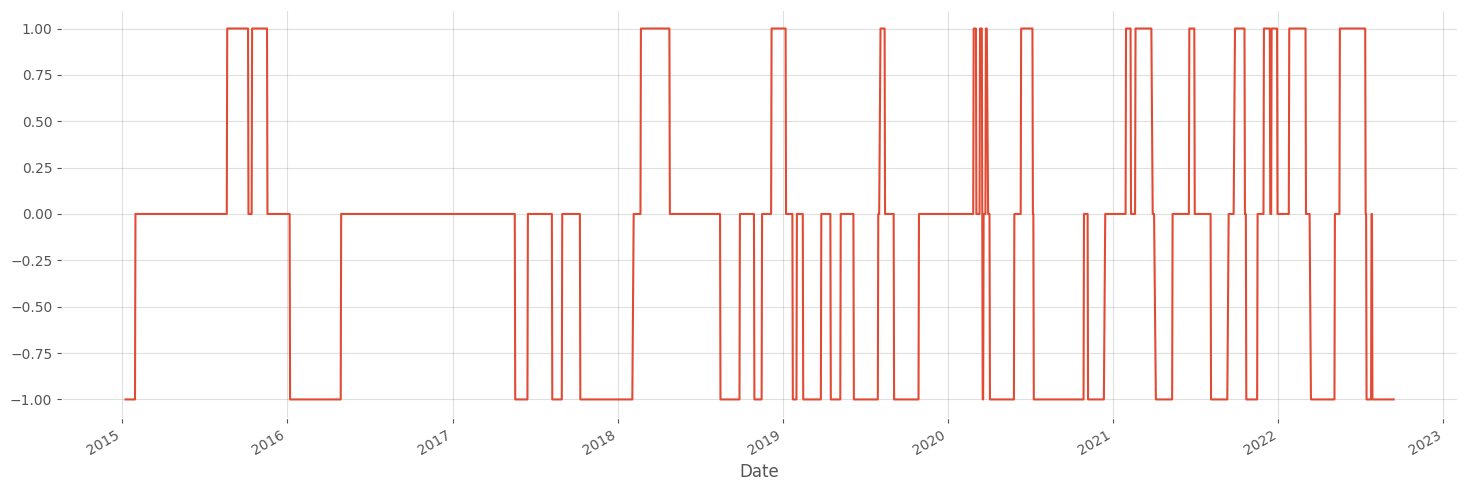

In [27]:
(
    WMT_trade["trading_positions"]
    .iloc[SMA: ]
    .plot(figsize = [18, 6],
          ylim = [-1.10, 1.10]
         )
)

<Axes: xlabel='Date'>

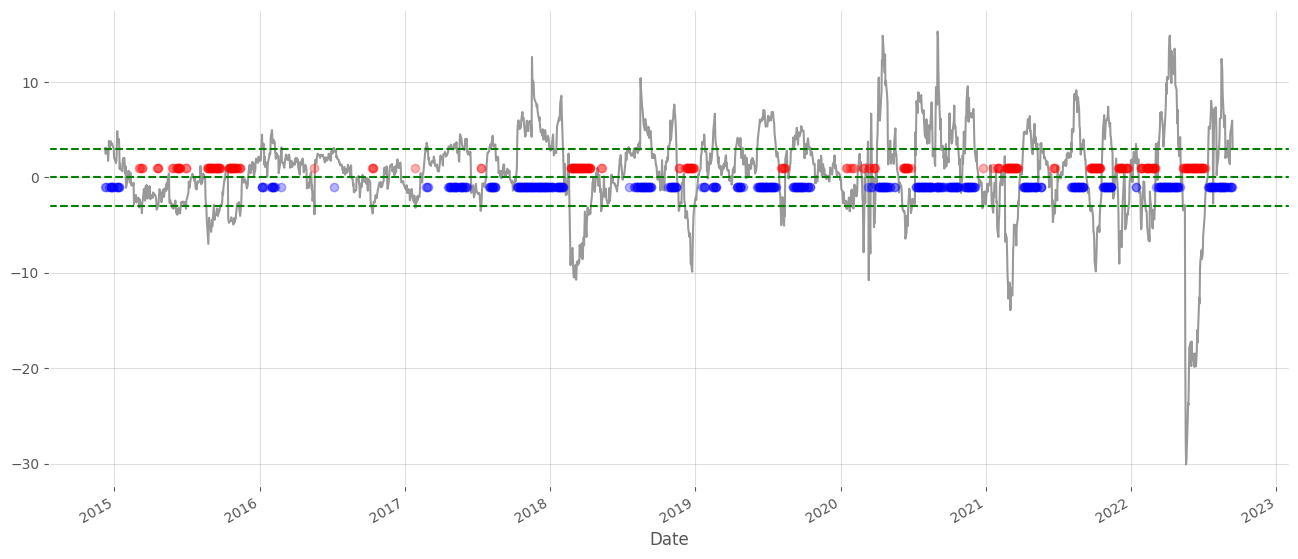

In [28]:
(
WMT_trade["distance"]
.dropna()
.plot(figsize = [16, 7],
      color = "grey",
      alpha = 0.80)
)

# Upper-bound threshold

plt.axhline(3,
            color = "green",
            ls = "--")

# Lower-bound threshold

plt.axhline(-3,
            color = "green",
            ls = "--")
# Mid line
plt.axhline(0, color = "green", ls = "--")

# Sell Signal

WMT_trade["positions"] =\
(
    np
    .where(WMT_trade["distance"] > 3,
           -1, np.nan)
)

# Buy Signal

WMT_trade["positions"] =\
(
    np
    .where(WMT_trade["distance"] < -3,
           1, WMT_trade["positions"])
)

# Market-Neutral Signal

WMT_trade["positions"] =\
(
    np
    .where(WMT_trade["distance"] * WMT_trade["distance"].shift(1) < 0,
           0, WMT_trade["positions"])
)

(
    WMT_trade["positions"]
    .dropna()\
    [WMT_trade["positions"]==1]
    .plot(figsize = [16 , 7],
          color = "red",
          style = "o",
          alpha = 0.30)
    
)
(
    WMT_trade["positions"]
    .dropna()\
    [WMT_trade["positions"]==-1]
    .plot(figsize = [16 , 7],
          color = "blue",
          style = "o",
          alpha = 0.30)
    
)

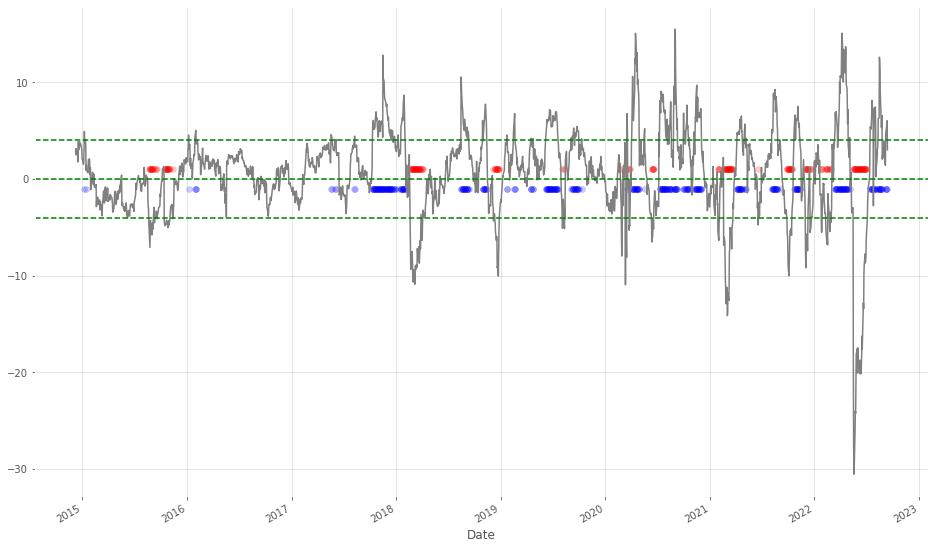

### Then, please come up with an answer for the question below.

    Based on mean-reversion strategy, there were _______ trading opportunities found.

### <font color = red> Question 7</font> Please draw the strategy returns as shown below.

In [29]:
WMT_trade["STRATEGY"] =\
    (
    WMT_trade
    ["trading_positions"]
    .shift(1)
    *
    WMT_trade["RETURNS"]
    )

<Axes: xlabel='Date'>

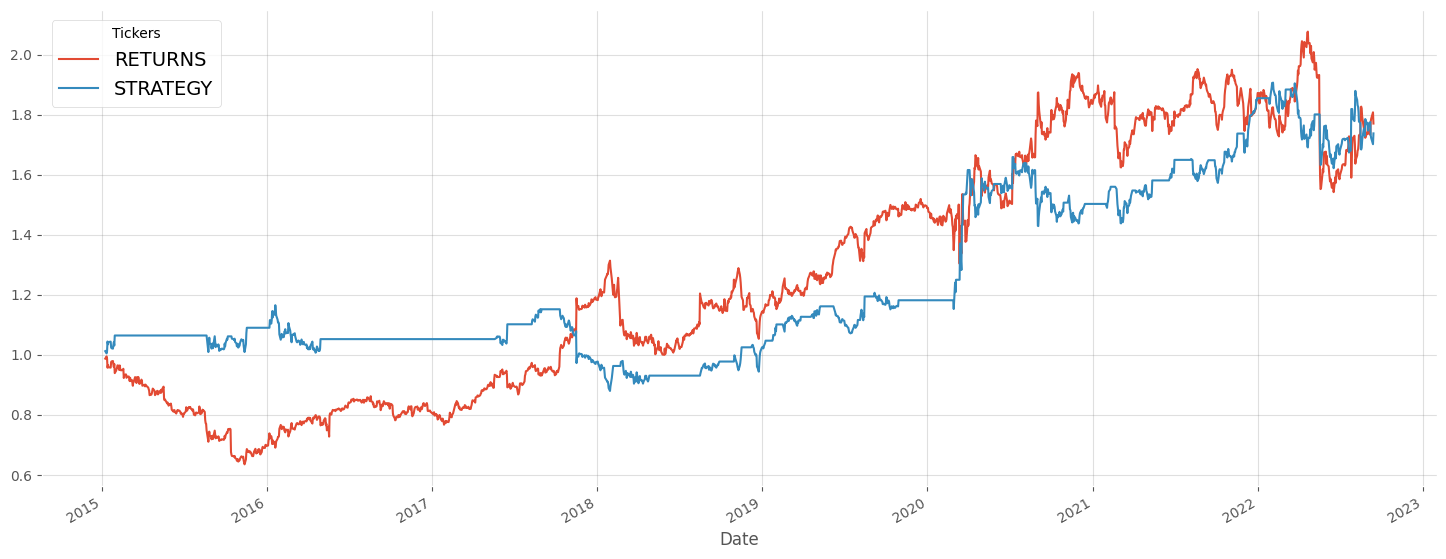

In [30]:
(
    WMT_trade
    [["RETURNS", "STRATEGY"]]
    .dropna()
    .cumsum()
    .apply(np.exp)
    .plot(figsize = [18, 7]
         )
)

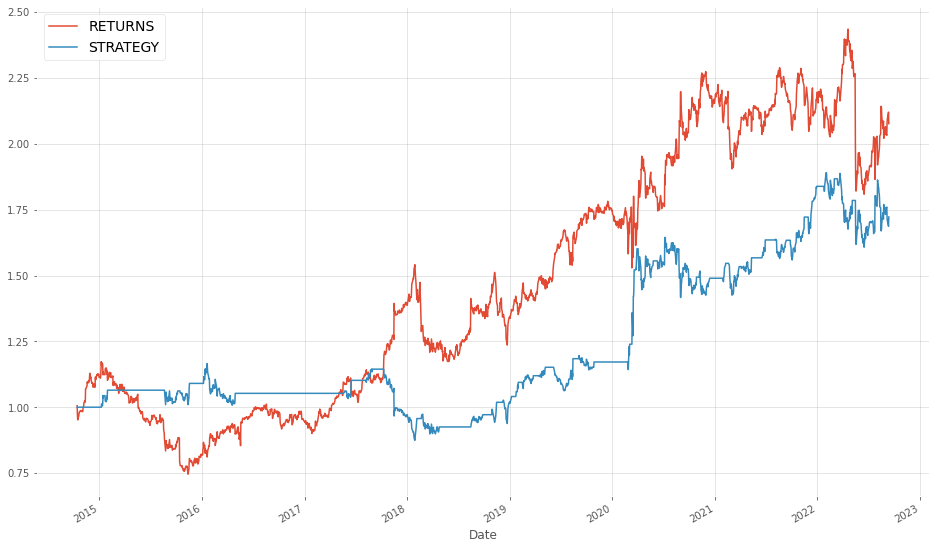

### <font color = red> Question 8</font>. Please calculate the Sharpe Ratio of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a Sharpe ratio of _________ . 

    Mean reversion strategy for WMT leads to a Sharpe ratio of _________ .

In [31]:
Sharpe_IBM =\
(
    np.sqrt(253) * (IBM_trade["STRATEGY"].mean() / IBM_trade["STRATEGY"].std()
                    )
)

Sharpe_IBM

-0.5116563599543799

In [32]:
Sharpe_WMT =\
(
    np.sqrt(253) * (WMT_trade["STRATEGY"].mean() / WMT_trade["STRATEGY"].std()
                    )
)

Sharpe_WMT

0.44626864017498474

### <font color = red> Question 9</font>. Please calculate the Compound Annual Growth Rate (CAGR) of the strategies for `IBM` and `WMT`, respectively.

    Simple moving strategy for IBM leads to a CAGR of _________ . 

    Mean reversion strategy for WMT leads to a CAGR of _________ .


In [33]:
IBM_trade.index[-1]

Timestamp('2022-09-13 00:00:00')

In [34]:
days_IBM =\
(    (IBM_trade.index[-1] - IBM_trade.index[0])
     .days
)


CAGR_IBM =\
(
    (
      (
        (IBM_trade["IBM"][-1]) / (IBM_trade["IBM"][0])
      )
        **(365.0/days_IBM) 
    ) 
    - 1
)

CAGR_IBM

0.024064039790939518

In [35]:
days_WMT =\
(    (IBM_trade.index[-1] - IBM_trade.index[0])
     .days
)


CAGR_WMT =\
(
    (
      (
        (WMT_trade["WMT"][-1]) / (WMT_trade["WMT"][0])
      )
        **(365.0/days_WMT) 
    ) 
    - 1
)

CAGR_WMT

0.09970779034273725

In [36]:
days_IBM, days_WMT

(2806, 2806)

### <font color = red> Question 10</font>. This question is based on the following scenario. After reading it, please respond to the associated sub-questions.

> Scenario: You've been appointed as a Quantitative Researcher in the process-driven investing division of a leading hedge fund. As part of your onboarding challenge, you are handed data (`alphas.csv`) for three experimental trading models, codenamed Alphas A, B, and C. These models, each initiated with a capital of 100K, demonstrate nearly identical Sharpe ratios across a span of 1120 trading days. Intrigued by this uniformity yet aware of the Sharpe ratio's shortcomings, you embark on a journey to dissect the Alphas' performance through a multifaceted quantitative lens.

> 10-1. Sharpe Ratio Diagnostics:

- Given the daily return series for Alphas A, B, and C:

- Derive the annualized Sharpe ratio for each Alpha, with the industry-standard assumption of 252 trading days per annum. In light of these findings, how might you reconsider the perceived risk-adjusted returns of these models?

> 10-2. Trajectory of Cumulative Returns:
    
- Visualize and compare the cumulative returns of each Alpha.

> 10-3. Cumulative Returns Over a 1120-Day Horizon:
- Extrapolate the cumulative returns for each Alpha over this period. When evaluating based on the Compound Annual Growth Rate (CAGR), how do these Alphas stack up against one another?

> 10.4 Delving into Maximum Drawdown (MDD):
- Assess the Maximum Drawdown (MDD) for each model within this time frame. Based on this assessment, which Alpha appears best equipped to withstand market downturns?

> 10.5 Examining Drawdown Duration:
- Analyze the longest drawdown durations for each strategy. Which of the Alphas seems to have the quickest recovery mechanism following a significant drawdown?

> 10.6 Comprehensive Assessment of Strategy Performance:
- By synthesizing data from metrics such as the Sharpe ratio, cumulative returns trajectory, MDD, and drawdown duration, provide a well-rounded analysis of the three Alphas. Rank and justify your recommendations based on your quantitative insights.

> 10.7 Reflecting on the Sharpe Ratio:
- Given the observed disparities in cumulative returns and MDD among the Alphas, even with similar Sharpe ratios, evaluate the effectiveness of relying solely on the Sharpe ratio. Can you propose additional or refined metrics to differentiate between Alphas with matching Sharpe values but varying performances in other critical areas?

# Draft Answer for Q10

> 10-1. Sharpe Ratio Diagnostics:

In [46]:
abc =\
    (pd
     .read_csv("alphas.csv")
    )

abc =\
(
    abc
    .rename(columns = {'Unnamed: 0': "Date"}
           )
)
abc['Date'] = abc.Date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
abc = abc.set_index('Date')

In [47]:
abc

,Alphas A,Alphas B,Alphas C
Date,,,
2019-05-28,100.000000,100.000000,100.000000
2019-05-29,100.562415,101.991696,100.733993
2019-05-30,98.903615,104.527038,100.568916
2019-05-31,101.046406,107.799053,99.186270
2019-06-03,101.649234,107.750748,101.323467
...,...,...,...
2023-09-06,87.171517,85.212876,88.864669
2023-09-07,87.770479,85.143390,87.782382
2023-09-08,88.204118,84.376805,87.391530


In [48]:
from datetime import datetime

In [56]:
Sharpe_abc =\
(
    abc[abc.columns]
    .apply(lambda x: 
           np.sqrt(252) * 
           (x.pct_change().mean() / x.pct_change().std()))                    
)

Sharpe_abc

Alphas A   -0.057912
Alphas B   -0.067833
Alphas C   -0.062779
dtype: float64

All are negetive expections. Not a valid choice of investment

> 10-2. Trajectory of Cumulative Returns:

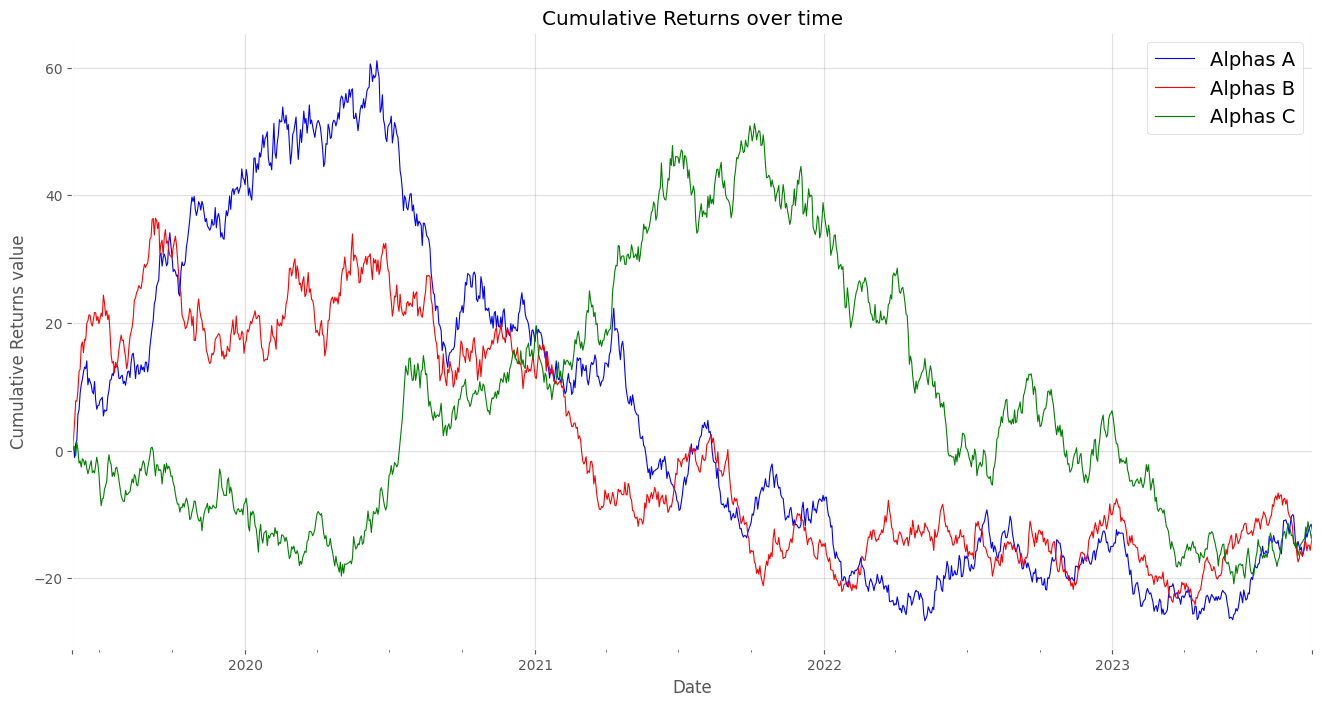

In [112]:
fig = plt.figure(figsize = [16, 8])

(abc['Alphas A']-abc['Alphas A'][0]).plot(color = "blue",
                    lw = 0.80,
                    label = "Alphas A")
                               

(abc['Alphas B']-abc['Alphas B'][0]).plot(color = "red",
                    lw = 0.80,
                    label = 'Alphas B')

(abc['Alphas C']-abc['Alphas C'][0]).plot(color = "green",
                    lw = 0.80,
                    label = 'Alphas C')

# Add a legend
plt.legend()
# Set the y-label and plot title
plt.ylabel('Cumulative Returns value')
plt.title('Cumulative Returns over time')

# # Set the x and y axis limits
# plt.xlim(dt.datetime(2019, 6, 3), dt.datetime(2023, 9, 12)) 
# plt.ylim(-5, 5) 

plt.show()

> 10-3. Cumulative Returns Over a 1120-Day Horizon:

In [71]:
abc.index[0]

Timestamp('2019-05-28 00:00:00')

In [86]:
abc['Days'] = (abc.index - abc.index[0]).days
abc

,Alphas A,Alphas B,Alphas C,Days
Date,,,,
2019-05-28,100.000000,100.000000,100.000000,0
2019-05-29,100.562415,101.991696,100.733993,1
2019-05-30,98.903615,104.527038,100.568916,2
2019-05-31,101.046406,107.799053,99.186270,3
2019-06-03,101.649234,107.750748,101.323467,6
...,...,...,...,...
2023-09-06,87.171517,85.212876,88.864669,1562
2023-09-07,87.770479,85.143390,87.782382,1563
2023-09-08,88.204118,84.376805,87.391530,1564


In [87]:
CAGR_A = (abc['Alphas A']/abc['Alphas A'][0])**(365.0/abc['Days']) - 1
CAGR_B = (abc['Alphas B']/abc['Alphas B'][0])**(365.0/abc['Days']) - 1
CAGR_C = (abc['Alphas C']/abc['Alphas C'][0])**(365.0/abc['Days']) - 1

In [127]:
(CAGR_A[-1], CAGR_B[-1], CAGR_C[-1])

(-0.031118378421203463, -0.03284206871157236, -0.03185281900118708)

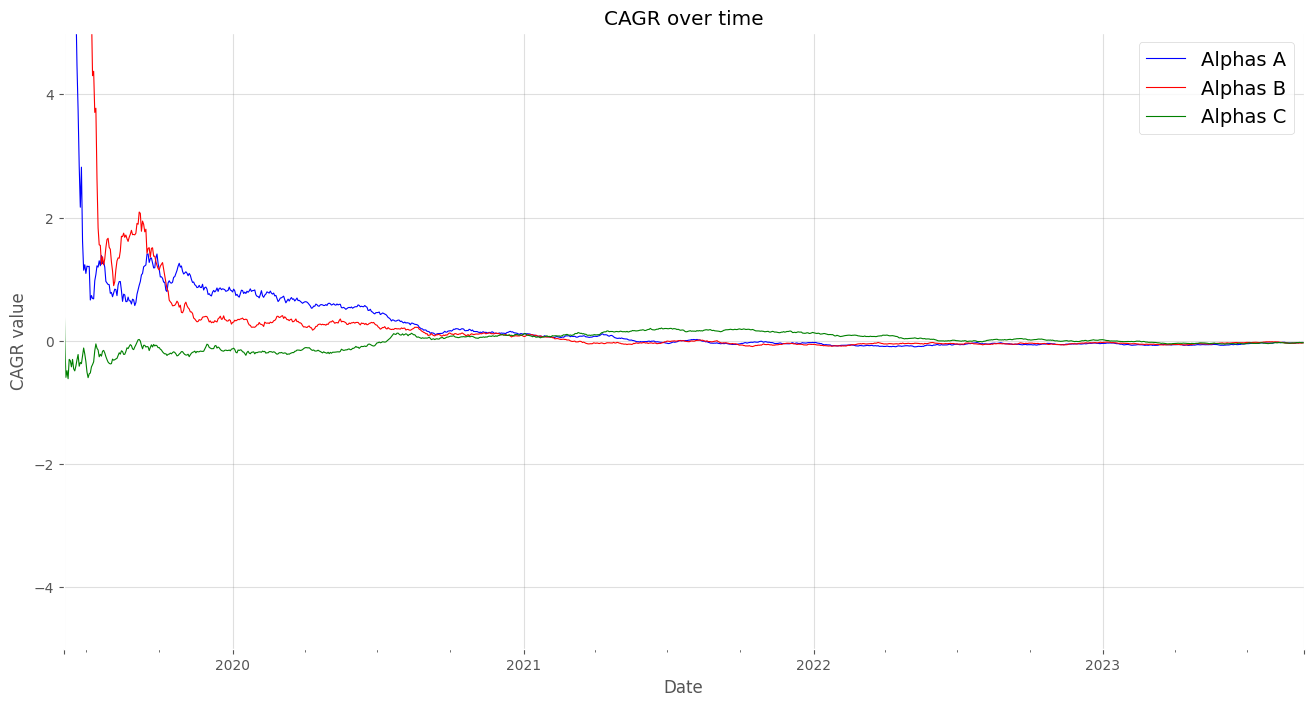

In [113]:
fig = plt.figure(figsize = [16, 8])

CAGR_A.plot(color = "blue",
                    lw = 0.80,
                    label = "Alphas A")
                               

CAGR_B.plot(color = "red",
                    lw = 0.80,
                    label = 'Alphas B')

CAGR_C.plot(color = "green",
                    lw = 0.80,
                    label = 'Alphas C')

# Add a legend
plt.legend()
# Set the y-label and plot title
plt.ylabel('CAGR value')
plt.title('CAGR over time')

# Set the x and y axis limits
plt.xlim(dt.datetime(2019, 6, 3), dt.datetime(2023, 9, 12))  # Set x-axis limits from (2019, 6, 3) to (2023, 9, 12)
plt.ylim(-5, 5) # Set y-axis limits from -5 to 5

plt.show()

There are very large values on starting days, as time is short, and thus the CAGR power effects play a significant role.

When really choosing on investment strategies, we shall let the out of sample test run for longer time before informed decision can be made.

> 10.4 Delving into Maximum Drawdown (MDD):

In [136]:
MDD_A = abc[['Alphas A']]

MDD_A["log_returns"] =\
(
    np
    .log(MDD_A["Alphas A"] / MDD_A["Alphas A"].shift(1)
        )
)


MDD_A["cumulative_returns"] =\
(
    MDD_A["log_returns"]
    .cumsum()
    .apply(np.exp)
)


MDD_A["max_gross_performance"] =\
(
    MDD_A
    ["cumulative_returns"]
    .cummax()
)
MDD_A

,Alphas A,log_returns,cumulative_returns,max_gross_performance
Date,,,,
2019-05-28,100.000000,NaN,NaN,NaN
2019-05-29,100.562415,0.005608,1.005624,1.005624
2019-05-30,98.903615,-0.016633,0.989036,1.005624
2019-05-31,101.046406,0.021434,1.010464,1.010464
2019-06-03,101.649234,0.005948,1.016492,1.016492
...,...,...,...,...
2023-09-06,87.171517,0.008753,0.871715,1.610776
2023-09-07,87.770479,0.006848,0.877705,1.610776
2023-09-08,88.204118,0.004928,0.882041,1.610776


<Axes: xlabel='Date'>

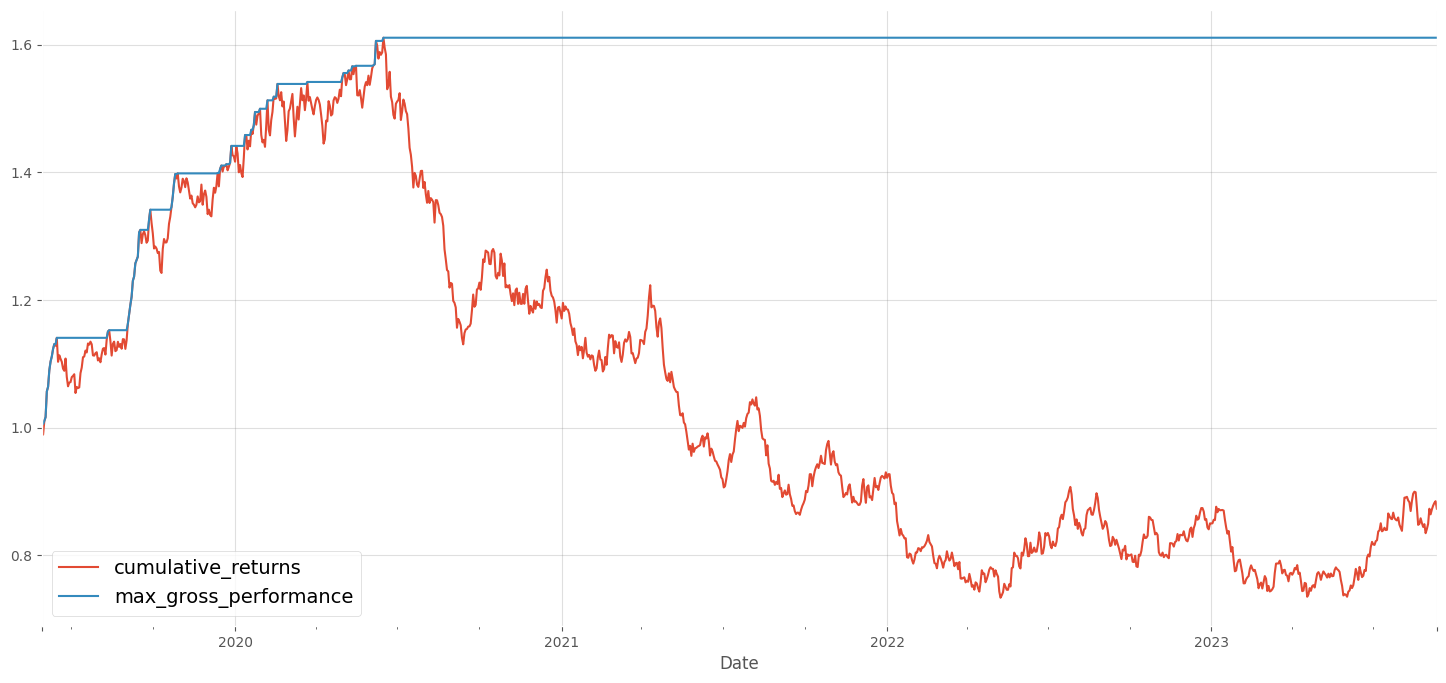

In [137]:
(
    MDD_A
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

In [120]:
MDD_B = abc[['Alphas B']]

MDD_B["log_returns"] =\
(
    np
    .log(MDD_B["Alphas B"] / MDD_B["Alphas B"].shift(1)
        )
)


MDD_B["cumulative_returns"] =\
(
    MDD_B["log_returns"]
    .cumsum()
    .apply(np.exp)
)


MDD_B["max_gross_performance"] =\
(
    MDD_B
    ["cumulative_returns"]
    .cummax()
)
MDD_B

,Alphas B,log_returns,cumulative_returns,max_gross_performance
Date,,,,
2019-05-28,100.000000,NaN,NaN,NaN
2019-05-29,101.991696,0.019721,1.019917,1.019917
2019-05-30,104.527038,0.024554,1.045270,1.045270
2019-05-31,107.799053,0.030823,1.077991,1.077991
2019-06-03,107.750748,-0.000448,1.077507,1.077991
...,...,...,...,...
2023-09-06,85.212876,0.010879,0.852129,1.363998
2023-09-07,85.143390,-0.000816,0.851434,1.363998
2023-09-08,84.376805,-0.009044,0.843768,1.363998


<Axes: xlabel='Date'>

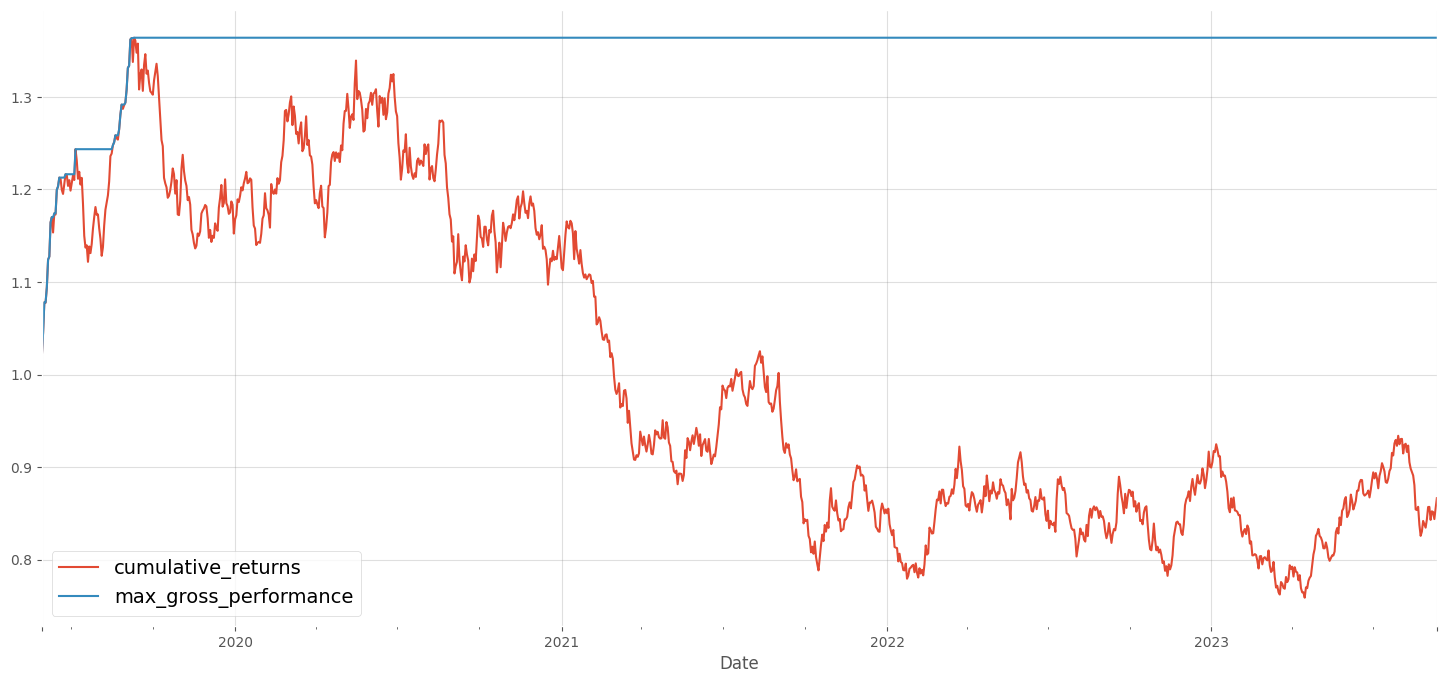

In [121]:
(
    MDD_B
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

In [124]:
MDD_C = abc[['Alphas C']]

MDD_C["log_returns"] =\
(
    np
    .log(MDD_C["Alphas C"] / MDD_C["Alphas C"].shift(1)
        )
)


MDD_C["cumulative_returns"] =\
(
    MDD_C["log_returns"]
    .cumsum()
    .apply(np.exp)
)


MDD_C["max_gross_performance"] =\
(
    MDD_C
    ["cumulative_returns"]
    .cummax()
)
MDD_C

,Alphas C,log_returns,cumulative_returns,max_gross_performance
Date,,,,
2019-05-28,100.000000,NaN,NaN,NaN
2019-05-29,100.733993,0.007313,1.007340,1.007340
2019-05-30,100.568916,-0.001640,1.005689,1.007340
2019-05-31,99.186270,-0.013844,0.991863,1.007340
2019-06-03,101.323467,0.021318,1.013235,1.013235
...,...,...,...,...
2023-09-06,88.864669,0.019709,0.888647,1.512298
2023-09-07,87.782382,-0.012254,0.877824,1.512298
2023-09-08,87.391530,-0.004462,0.873915,1.512298


<Axes: xlabel='Date'>

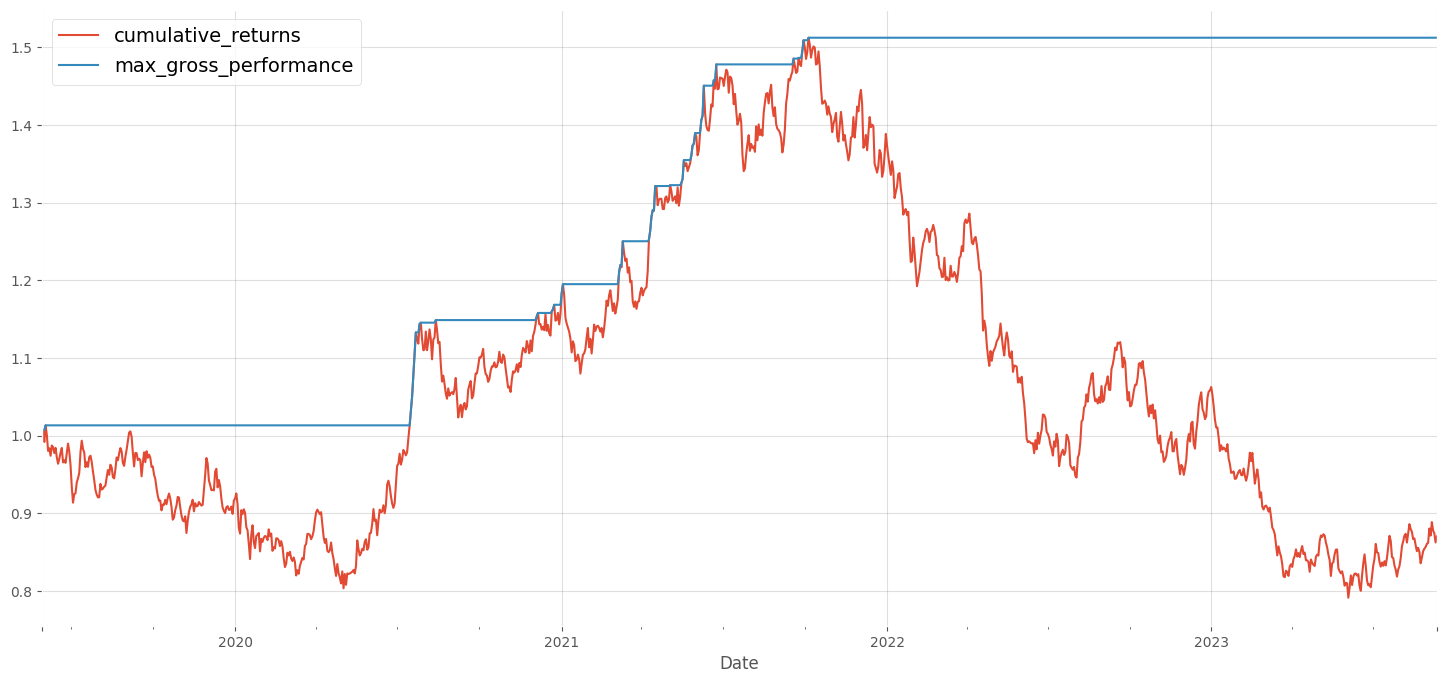

In [125]:
(
    MDD_C
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

In [126]:
drawdown_A = MDD_A["max_gross_performance"] - MDD_A["cumulative_returns"]
drawdown_B = MDD_B["max_gross_performance"] - MDD_B["cumulative_returns"]
drawdown_C = MDD_C["max_gross_performance"] - MDD_C["cumulative_returns"]

(drawdown_A.max(), drawdown_B.max(), drawdown_C.max())

(0.877231802631283, 0.6052287367482283, 0.7210010902745291)

> 10.5 Examining Drawdown Duration:

In [157]:
periods_A =\
(
    drawdown_A[drawdown_A == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_A[drawdown_A == 0].index[   : -1].to_pydatetime()
)
periods_A = np.append(periods_A, drawdown_A.index[-1].to_pydatetime() -
                      drawdown_A[drawdown_A == 0].index[-1].to_pydatetime())

periods_B =\
(
    drawdown_B[drawdown_B == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_B[drawdown_B == 0].index[   : -1].to_pydatetime()
)
periods_B = np.append(periods_B, drawdown_B.index[-1].to_pydatetime() -
                      drawdown_B[drawdown_B == 0].index[-1].to_pydatetime())

periods_C =\
(
    drawdown_C[drawdown_C == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown_C[drawdown_C == 0].index[   : -1].to_pydatetime()
)
periods_C = np.append(periods_C, drawdown_C.index[-1].to_pydatetime() -
                      drawdown_C[drawdown_C == 0].index[-1].to_pydatetime())


In [158]:
# exclude the super long draw down since the last peak, the draw down time be like
(periods_A[:-1].max(), periods_B[:-1].max(), periods_C[:-1].max())

(datetime.timedelta(days=59),
 datetime.timedelta(days=42),
 datetime.timedelta(days=409))

In [159]:
# if also to count in the super long draw down since the last peak
(periods_A.max(), periods_B.max(), periods_C.max())

(datetime.timedelta(days=1183),
 datetime.timedelta(days=1463),
 datetime.timedelta(days=706))

The draw down period for in-complete cycles are even crucial, especially when there is a huge variance in sampled draw down days

> 10.6 Comprehensive Assessment of Strategy Performance:

In [195]:
Sharpe_abc.name = 'Sharpe Ratio'
abc_assess = Sharpe_abc.to_frame()
abc_assess['CAGR'] = [CAGR_A[-1], CAGR_B[-1], CAGR_C[-1]]
abc_assess['MDD'] = [drawdown_A.max(), drawdown_B.max(), drawdown_C.max()]
abc_assess['Max Drawdown days'] = [periods_A[:-1].max(), periods_B[:-1].max(), periods_C[:-1].max()]
abc_assess['Days since last peak'] = [periods_A[-1].days, periods_B[-1].days, periods_C[-1].days]

In [197]:
abc_assess

,Sharpe Ratio,CAGR,MDD,Max Drawdown days,Days since last peak
Alphas A,-0.057912,-0.031118,0.877232,59 days,1183
Alphas B,-0.067833,-0.032842,0.605229,42 days,1463
Alphas C,-0.062779,-0.031853,0.721001,409 days,706


#### Alphas A: 
has the highest Sharpe Ratio, but still negative returns. Large Max drawdown, even though the max drawdown days is relatively small, the days since last peak is very huge, and still counting.
#### Alphas B: 
has the least Drawdown of around 60%, the smallest max drawdown days.
        but still negative Sharpe Ration implies negative expected returns. 
        and relative long days since last peak.
#### Alphas C: 
the max drawdown time is clocked at 409 days, but days since last drawdown is still of more than 700 days.
        negative Sharpe Ration implies negative expected returns. 
        relative large max drawdown scale of 72% observed. 

> 10.7 Reflecting on the Sharpe Ratio:

As for choosing on investment solutions, we wish to have:

1. positive Sharpe Ratio, the bigger the better
2. positive CAGR, the bigger the better
3. relative smaller Max Drawdown percentage
4. relative smaller Max Drawdown period

a typical evaluation function could be:

Score = (x1 * Sharpe Ratio + x2 * CAGR) / ((x3 * Max Drawdown percentage) * (x4 * Max Drawdown period)) 

the higher Score implies better investment choice.

for different type of investors, we can have different X-vector for evaluation:

1. for accredit investor, maybe the x3 and x4 weightage could be relatively small
2. for retail investor, maybe the x4 is very crucial and thus need to assign a big number for increased significance
3. for balanced investor, maybe the medium number for all X-vector scalars shall be assigned to balance on investment needs.

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>